<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_5/blob/main/Tutorials/tutorial_3/2_gaussclumps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The GaussClumps Algorithm

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Get scipy optimisation functions
from scipy.optimize import curve_fit

# Get image from database
from skimage import data

## 1. Functions for Gaussians and Peak Finding

In [2]:
# 2D Gaussian
def gaussian_2d(coords, amp, x0, y0, sigma_x, sigma_y):
  """
  """
  # Read grid
  x, y = coords

  # Gaussian function
  g_function = amp * np.exp(-(((x - x0)**2) / (2 * sigma_x**2) + ((y - y0)**2) / (2 * sigma_y**2))).ravel()

  return g_function


# Peak finder
def find_peak(data):
  """
  """
  # Get max indices
  idx_max = np.where(np.nanmax(data) == data)

  # Pass to coordinates
  coordinates = (idx_max[0][0], idx_max[1][0])

  return coordinates[::-1], data[coordinates]

## 2. Functions for Gaussian fitting

In [3]:
def gaussclumps(img_dat):
  """
  """
  # Define number of clumps
  n_clumps = 2

  # Get residuals image
  res_dat = np.copy(img_dat)

  # Open empty list for Gaussians
  gaussians = []

  # Get indices
  y, x = np.indices(img_dat.shape)

  # For loop
  for _ in range(n_clumps):

      # Call peak finder
      (x0, y0), peak = find_peak(res_dat)
      #print(find_peak(res_dat))

      # Initial guess for Gaussian parameters
      initial_guess = (peak, x0, y0, 5., 5.)

      # Optimisation steps
      popt, _ = curve_fit(gaussian_2d, (x, y), res_dat.ravel(), p0=initial_guess)

      # Get parameters
      amp, x0_fit, y0_fit, sx, sy = popt

      # Get multi-Gaussian models
      model = gaussian_2d((x, y), *popt).reshape(img_dat.shape)

      # Remove model to update residuals
      res_dat -= model

      # Append Gaussians to list
      gaussians.append(popt)

  return gaussians

## 3. Read image 1:

In [4]:
# Get sample data from Scikit

image1 = np.array(data.cell(), dtype = np.float64)

image1 = image1/255

print("Image size is: ", image1.shape)

print("Min: ", np.min(image1), "Max:", np.max(image1))

# Get meshgrid
x, y = np.meshgrid(np.arange(image1.shape[1]), np.arange(image1.shape[0]))

#print(x.shape, y.shape)


Image size is:  (660, 550)
Min:  0.0 Max: 1.0


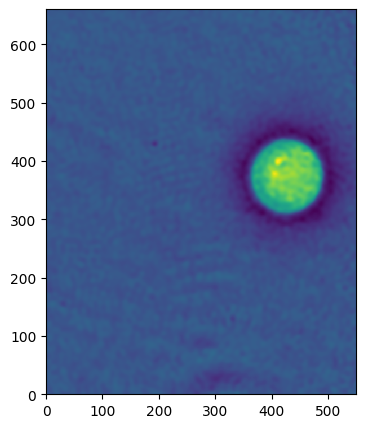

In [5]:
# Plot original, model, and res_dat
plt.figure(figsize=(4, 5))

plt.pcolor(image1, vmin=0., vmax= 1.)

plt.show()

In [6]:
# Call GaussClumps

gaussians1 = gaussclumps(image1)

#print(gaussians1)

model1 = sum(gaussian_2d((x, y), *p).reshape(image1.shape) for p in gaussians1)

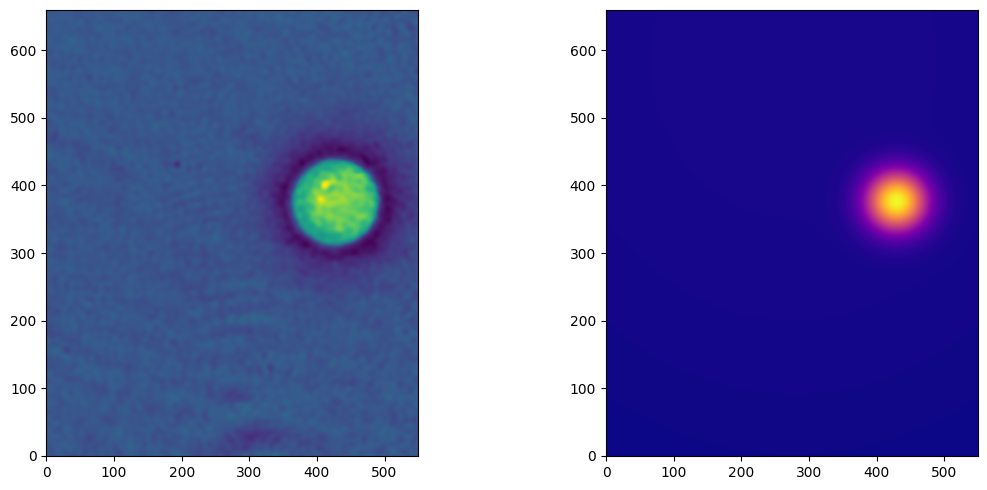

In [7]:
# Plot original, model, and res_dat
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(image1, origin='lower', cmap='viridis')
axs[1].imshow(model1, origin='lower', cmap='plasma')

plt.tight_layout()
plt.show()


## 4. Read image 2:

In [8]:
# Import libraries
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

In [9]:
# Import libraries
from google.colab import drive

In [10]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Get image
image_file = cbook.get_sample_data("/content/drive/MyDrive/epic5/castellon-clouds-l2a.png")

# New image object

image2 = plt.imread(image_file)

print(image2.shape)

(720, 815, 3)


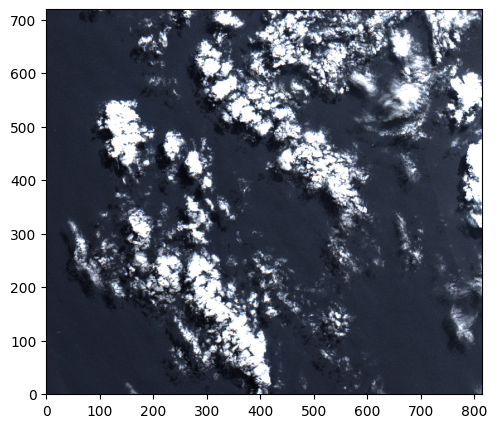

In [12]:
# Plot image

plt.figure(figsize = (6,5))

plt.imshow(image2, cmap = "inferno", origin='lower')

plt.show()

In [13]:
# Get sample data from Scikit

image2 = image2[:,:,0]/255

print("Image size is: ", image2.shape)

print("Min: ", np.min(image2), "Max:", np.max(image2))

x, y = np.meshgrid(np.arange(image2.shape[1]), np.arange(image2.shape[0]))

#print(x.shape, y.shape)

Image size is:  (720, 815)
Min:  6.151481e-05 Max: 0.003921569


In [14]:
# Call GaussClumps

gaussians2 = gaussclumps(image2)

#print(gaussians2)

model2 = sum(gaussian_2d((x, y), *p).reshape(image2.shape) for p in gaussians2)

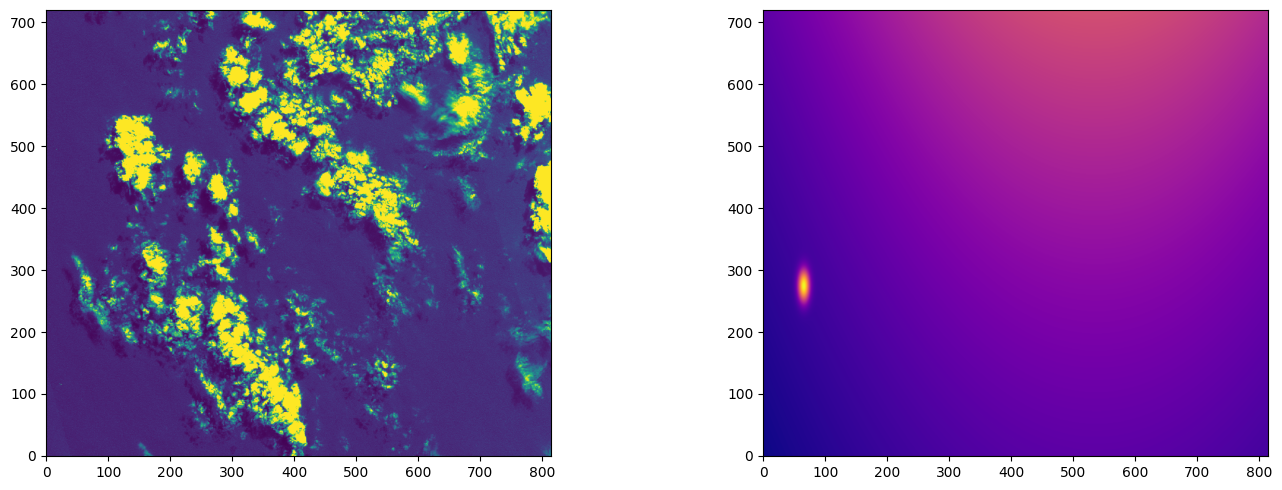

In [15]:
# Plot original, model, and res_dat
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].imshow(image2, origin='lower', cmap='viridis')
axs[1].imshow(model2, origin='lower', cmap='plasma')

plt.tight_layout()
plt.show()
